<a href="https://colab.research.google.com/github/vedantbharti/Predict-Covid/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
covid19 = pd.read_csv('covid_19_clean_complete.csv')
covid19.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0,emro
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0,euro
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0,afro
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0,euro
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0,afro


In [ ]:
print(covid19.shape)
print('\n Check for null values:')
print(covid19.isnull().sum())
print('\n\n Data types:\n',covid19.dtypes)

(36570, 9)

 Check for null values:
Province/State    25530
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
WHO Region          276
dtype: int64


 Data types:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
WHO Region         object
dtype: object


In [ ]:
#Drop the columns Province/State and WHO Region
covid19.drop(['Province/State','WHO Region'], axis=1, inplace=True)
covid19.head(10)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,Albania,41.1533,20.1683,1/22/20,0,0,0
2,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,Angola,-11.2027,17.8739,1/22/20,0,0,0
5,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0,0
6,Argentina,-38.4161,-63.6167,1/22/20,0,0,0
7,Armenia,40.0691,45.0382,1/22/20,0,0,0
8,Australia,-35.4735,149.0124,1/22/20,0,0,0
9,Australia,-33.8688,151.2093,1/22/20,0,0,0


In [ ]:
print(covid19.isnull().sum())

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64


In [ ]:
covid19['Date'] = pd.to_datetime(covid19['Date'])

In [ ]:
covid19.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


Total number of confirmed cases all over the world:  7009058
Total number of recovered cases all over the world:  3068626
Total number of deaths all over the world:           402730
Total number of active cases all over the world:     3537702
Total number of closed cases all over the world:     3471356


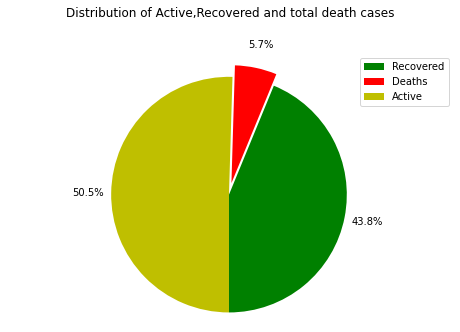

In [ ]:
#grouping confirmed,Deaths and Recovered as per the date and printing the data for the last date for which we have data
byDate = covid19.groupby(['Date']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
print('Total number of confirmed cases all over the world: ',byDate['Confirmed'].iloc[-1])
print('Total number of recovered cases all over the world: ',byDate['Recovered'].iloc[-1])
print('Total number of deaths all over the world:          ',byDate['Deaths'].iloc[-1])
print('Total number of active cases all over the world:    ',byDate['Confirmed'].iloc[-1]-byDate['Recovered'].iloc[-1]-byDate['Deaths'].iloc[-1])
print('Total number of closed cases all over the world:    ',byDate['Recovered'].iloc[-1]+byDate['Deaths'].iloc[-1])
labels = ['Recovered','Deaths','Active']
sizes = [byDate['Recovered'].iloc[-1],byDate['Deaths'].iloc[-1],byDate['Confirmed'].iloc[-1]-byDate['Recovered'].iloc[-1]-byDate['Deaths'].iloc[-1]]
colors = ['g','r','y']
explode = [0,0.1,0]
plt.figure(figsize=(8,5))
plt.pie(sizes,autopct='%1.1f%%',pctdistance=1.2,explode=explode,colors = colors,startangle=-90)
plt.axis('equal')
plt.title('Distribution of Active,Recovered and total death cases\n\n')
plt.legend(labels=labels,loc='upper right')
plt.show()

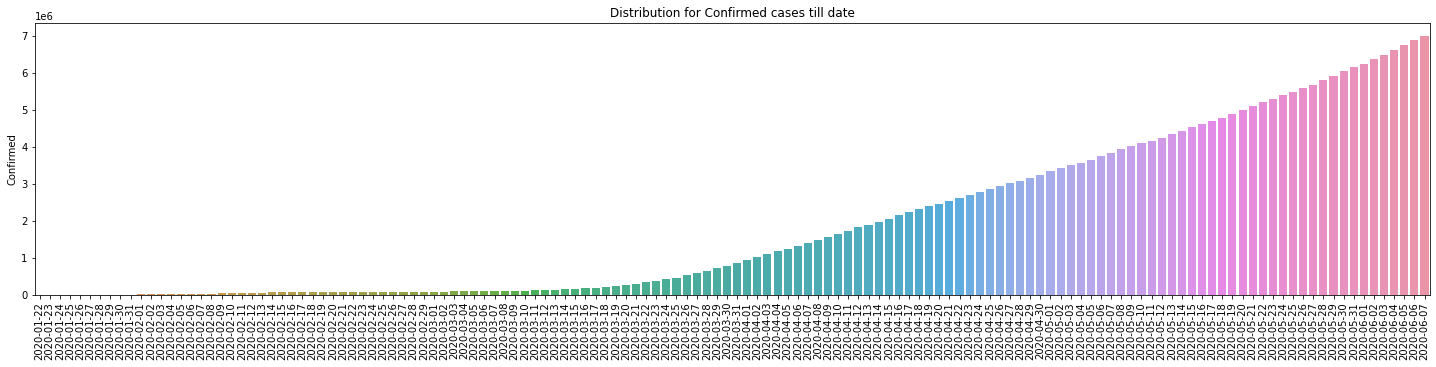

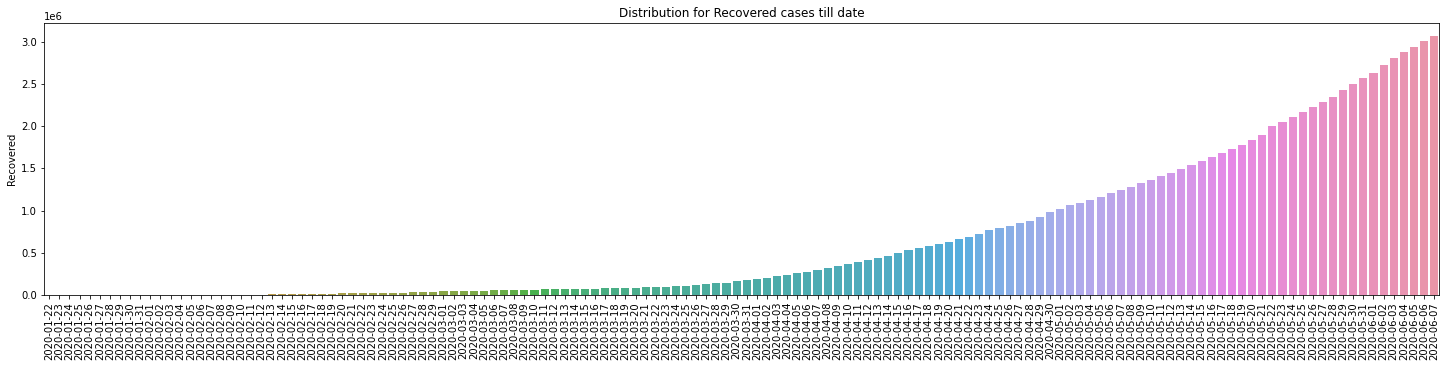

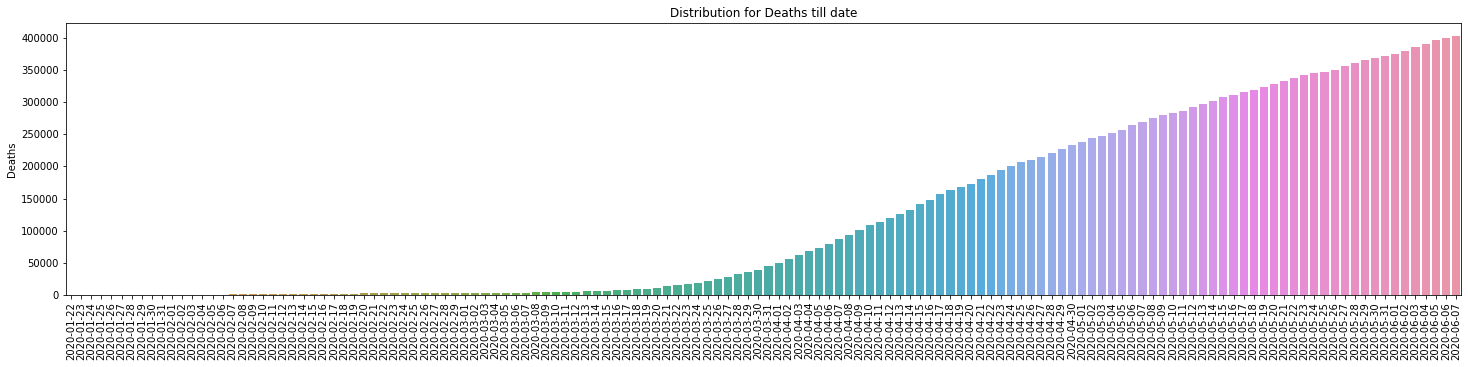

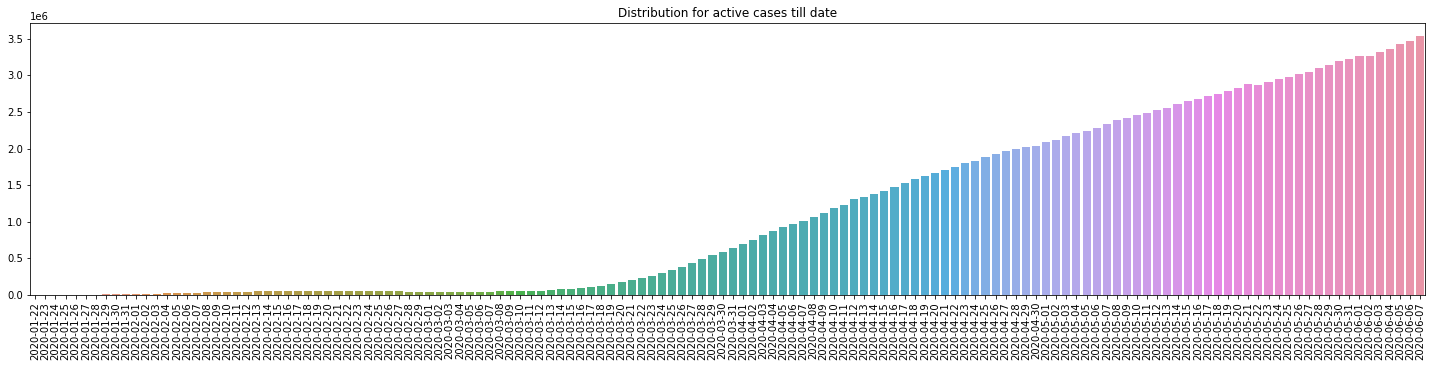

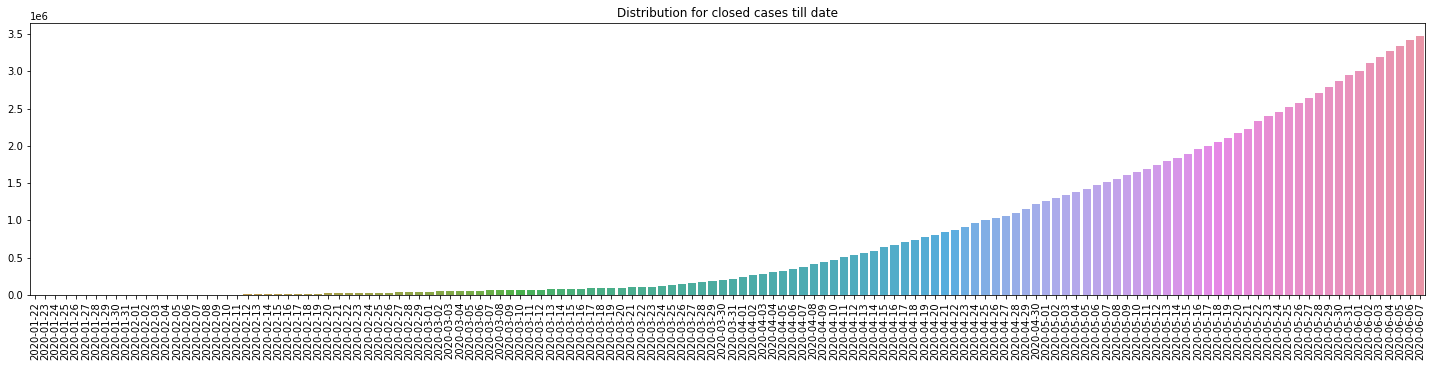

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot(x=byDate.index.date,y=byDate['Confirmed'])
plt.title('Distribution for Confirmed cases till date')
plt.xticks(rotation=90) #How x-axis values are shown
plt.show()
print('\n\n\n\n')

plt.figure(figsize=(25,5))
sns.barplot(x=byDate.index.date,y=byDate['Recovered'])
plt.title('Distribution for Recovered cases till date')
plt.xticks(rotation=90) #How x-axis values are shown
plt.show()
print('\n\n\n\n')

plt.figure(figsize=(25,5))
sns.barplot(x=byDate.index.date,y=byDate['Deaths'])
plt.title('Distribution for Deaths till date')
plt.xticks(rotation=90) #How x-axis values are shown
plt.show()
print('\n\n\n\n')

plt.figure(figsize=(25,5))
sns.barplot(x=byDate.index.date,y=byDate['Confirmed']-byDate['Deaths']-byDate['Recovered'])
plt.title('Distribution for active cases till date')
plt.xticks(rotation=90) #How x-axis values are shown
plt.show()
print('\n\n\n\n')

plt.figure(figsize=(25,5))
sns.barplot(x=byDate.index.date,y=byDate['Deaths']+byDate['Recovered'])
plt.title('Distribution for closed cases till date')
plt.xticks(rotation=90) #How x-axis values are shown
plt.show()
print('\n\n\n\n')

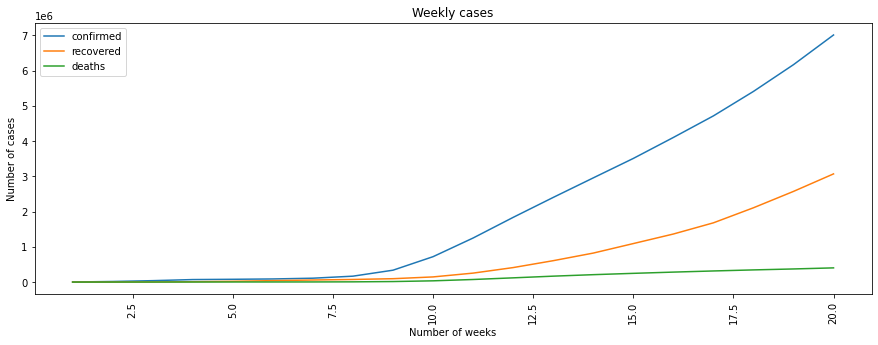

In [ ]:
byDate['Weekly'] = byDate.index.weekofyear
week_number = []
weekly_confirmed = []
weekly_recovered = []
weekly_deaths = []

week = 1
for i in list(byDate['Weekly'].unique()):
  weekly_confirmed.append(byDate[byDate['Weekly']==i]['Confirmed'].iloc[-1])
  weekly_recovered.append(byDate[byDate['Weekly']==i]['Recovered'].iloc[-1])
  weekly_deaths.append(byDate[byDate['Weekly']==i]['Deaths'].iloc[-1])
  week_number.append(week)
  week = week+1

plt.figure(figsize = (15,5))
sns.lineplot(week_number,weekly_confirmed,label='confirmed')
sns.lineplot(week_number,weekly_recovered,label='recovered')
sns.lineplot(week_number,weekly_deaths,label='deaths')
plt.title('Weekly cases')
plt.xlabel('Number of weeks')
plt.ylabel('Number of cases')
plt.legend()
plt.xticks(rotation=90)
plt.show()

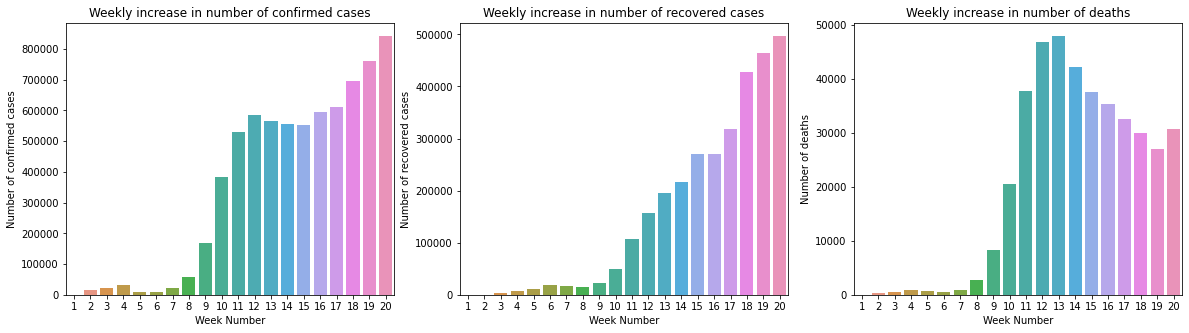

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
plt.subplots_adjust(hspace=1, wspace=0.2)
sns.barplot(x=week_number,y=pd.Series(weekly_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_number,y=pd.Series(weekly_recovered).diff().fillna(0),ax=ax2)
sns.barplot(x=week_number,y=pd.Series(weekly_deaths).diff().fillna(0),ax=ax3)
ax1.set_xlabel('Week Number')
ax2.set_xlabel('Week Number')
ax3.set_xlabel('Week Number')
ax1.set_ylabel('Number of confirmed cases')
ax2.set_ylabel('Number of recovered cases')
ax3.set_ylabel('Number of deaths')
ax1.set_title('Weekly increase in number of confirmed cases')
ax2.set_title('Weekly increase in number of recovered cases')
ax3.set_title('Weekly increase in number of deaths')
plt.show()

Average increase in number of confirmed cases everyday:  50786.0
Average increase in number of recovered cases everyday:  22236.0
Average increase in number of deaths everyday:           2918.0





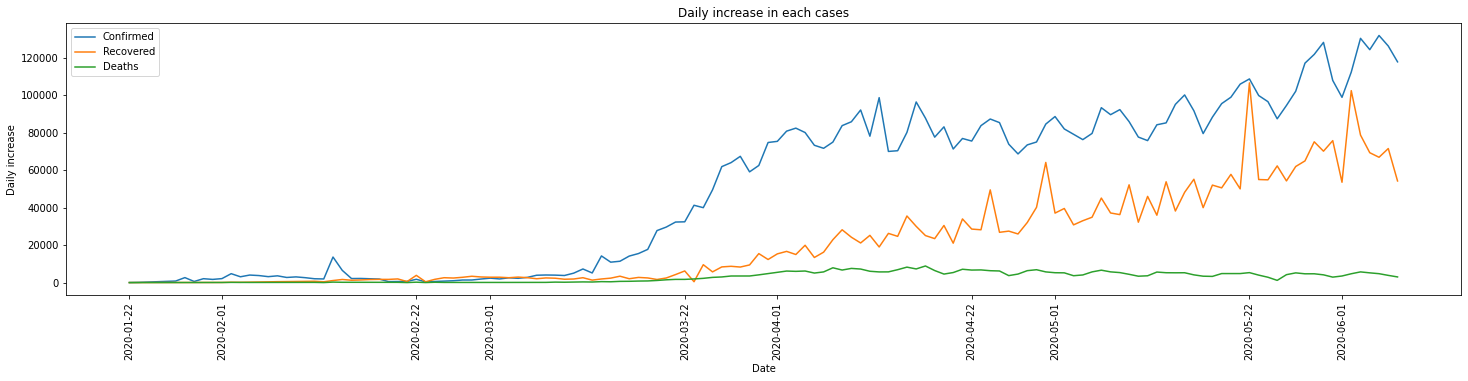

In [ ]:
print('Average increase in number of confirmed cases everyday: ',np.round(byDate['Confirmed'].diff().fillna(0).mean()))
print('Average increase in number of recovered cases everyday: ',np.round(byDate['Recovered'].diff().fillna(0).mean()))
print('Average increase in number of deaths everyday:          ',np.round(byDate['Deaths'].diff().fillna(0).mean()))
print('\n\n')
plt.figure(figsize=(25,5))
plt.plot(byDate['Confirmed'].diff().fillna(0),label='Confirmed')
plt.plot(byDate['Recovered'].diff().fillna(0),label='Recovered')
plt.plot(byDate['Deaths'].diff().fillna(0),label='Deaths')
plt.xlabel('Date')
plt.ylabel('Daily increase')
plt.title('Daily increase in each cases')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Countrywise analysis of mortality rate
#mortality rate = number of deaths/number of confirmed cases

byCountry = covid19[covid19['Date']==covid19['Date'].max()].groupby(['Country/Region']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(by='Confirmed',ascending=False)
byCountry['Mortality Rate'] = (byCountry['Deaths']/byCountry['Confirmed'])*100
byCountry['Recovery Rate'] = (byCountry['Recovered']/byCountry['Confirmed'])*100
byCountry


,Confirmed,Recovered,Deaths,Mortality Rate,Recovery Rate
Country/Region,,,,,
US,1942363,506367,110514,5.689668,26.069638
Brazil,691758,283952,36455,5.269907,41.047881
Russia,467073,226272,5851,1.252695,48.444676
United Kingdom,287621,1239,40625,14.124490,0.430775
India,257486,123848,7207,2.798987,48.098926
...,...,...,...,...,...
Seychelles,11,11,0,0.000000,100.000000
MS Zaandam,9,0,2,22.222222,0.000000
Western Sahara,9,6,1,11.111111,66.666667


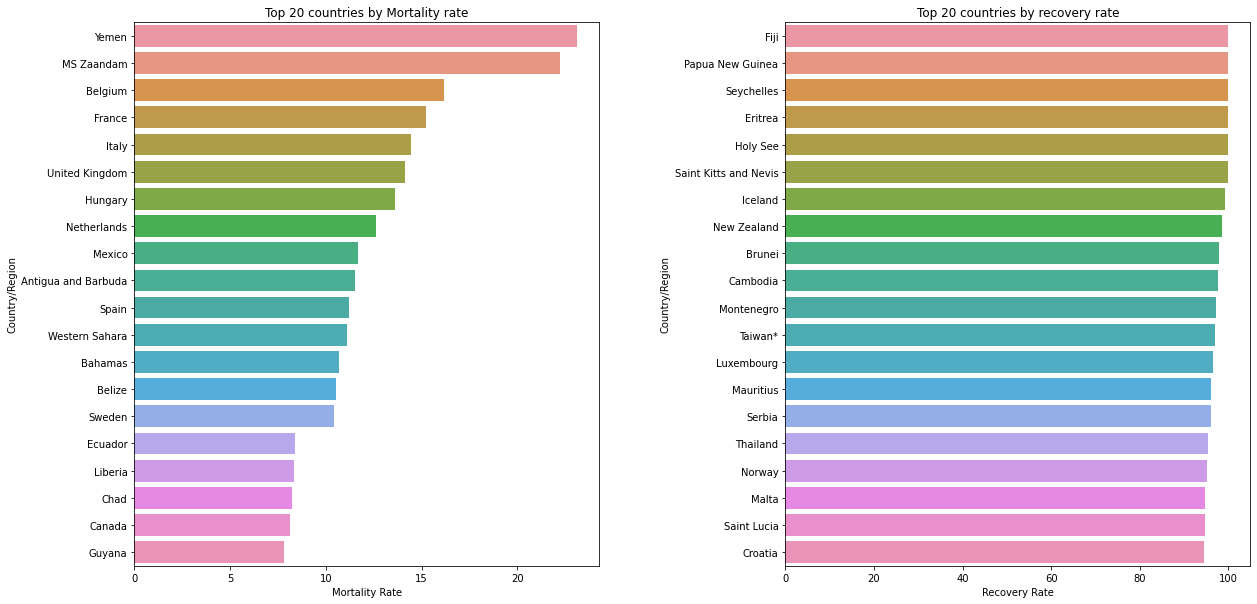

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plt.subplots_adjust(hspace=1, wspace=0.4)
top_20_mortality_countries = byCountry.sort_values(by='Mortality Rate',ascending=False).head(20)
top_20_recovery_countries = byCountry.sort_values(by='Recovery Rate',ascending=False).head(20)
sns.barplot(x=top_20_mortality_countries['Mortality Rate'],y=top_20_mortality_countries.index,ax=ax1)
sns.barplot(x=top_20_recovery_countries['Recovery Rate'],y=top_20_recovery_countries.index,ax=ax2)
ax1.set_title('Top 20 countries by Mortality rate')
ax2.set_title('Top 20 countries by recovery rate')
plt.show()

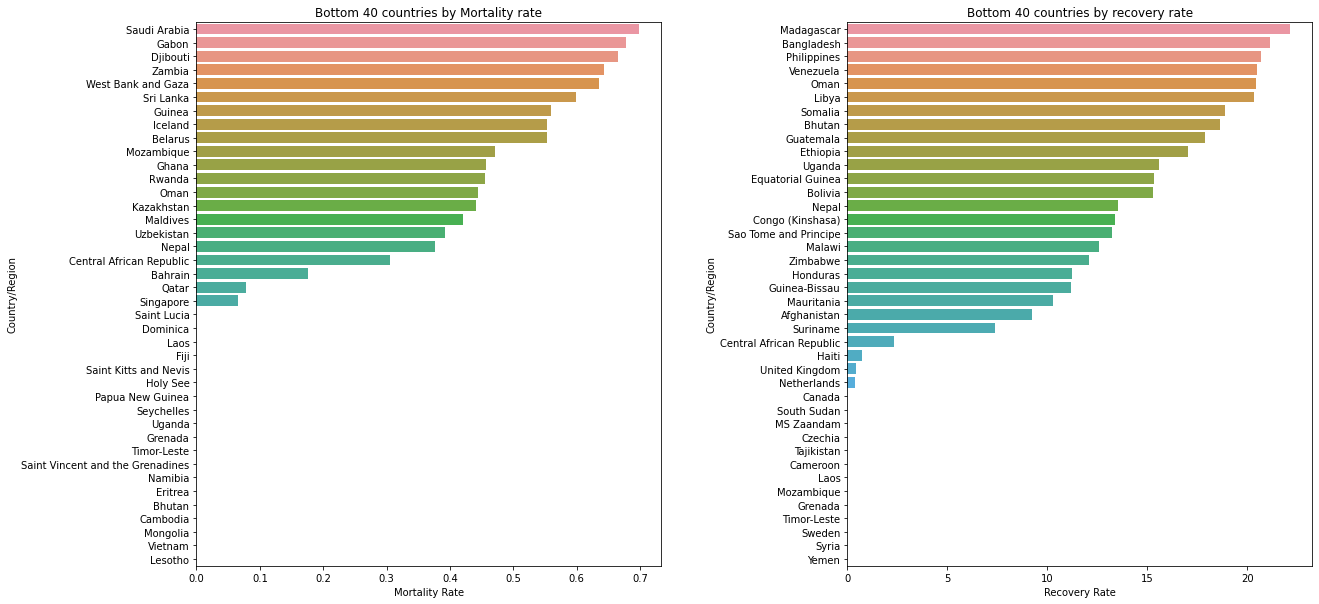

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plt.subplots_adjust(hspace=1, wspace=0.4)
bottom_40_mortality_countries = byCountry.sort_values(by='Mortality Rate',ascending=False).tail(40)
bottom_40_recovery_countries = byCountry.sort_values(by='Recovery Rate',ascending=False).tail(40)
sns.barplot(x=bottom_40_mortality_countries['Mortality Rate'],y=bottom_40_mortality_countries.index,ax=ax1)
sns.barplot(x=bottom_40_recovery_countries['Recovery Rate'],y=bottom_40_recovery_countries.index,ax=ax2)
ax1.set_title('Bottom 40 countries by Mortality rate')
ax2.set_title('Bottom 40 countries by recovery rate')
plt.show()

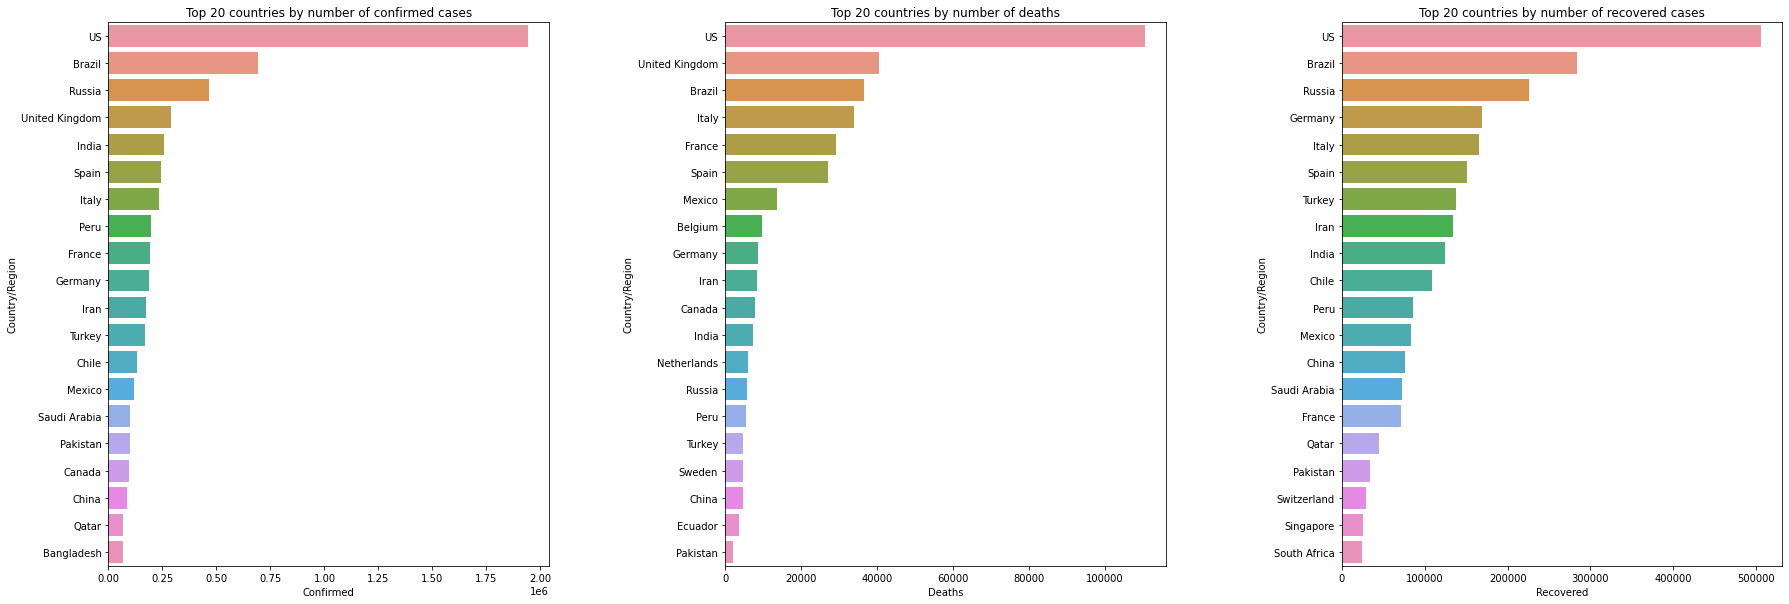

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))
plt.subplots_adjust(hspace=1, wspace=0.4)
top_20_confirmed_countries = byCountry.sort_values(by='Confirmed',ascending=False).head(20)
top_20_death_countries = byCountry.sort_values(by='Deaths',ascending=False).head(20)
top_20_recovered_countries = byCountry.sort_values(by='Recovered',ascending=False).head(20)
sns.barplot(x=top_20_confirmed_countries['Confirmed'],y=top_20_confirmed_countries.index,ax=ax1)
sns.barplot(x=top_20_death_countries['Deaths'],y=top_20_death_countries.index,ax=ax2)
sns.barplot(x=top_20_recovered_countries['Recovered'],y=top_20_recovered_countries.index,ax=ax3)
ax1.set_title('Top 20 countries by number of confirmed cases')
ax2.set_title('Top 20 countries by number of deaths')
ax3.set_title('Top 20 countries by number of recovered cases')
plt.show()

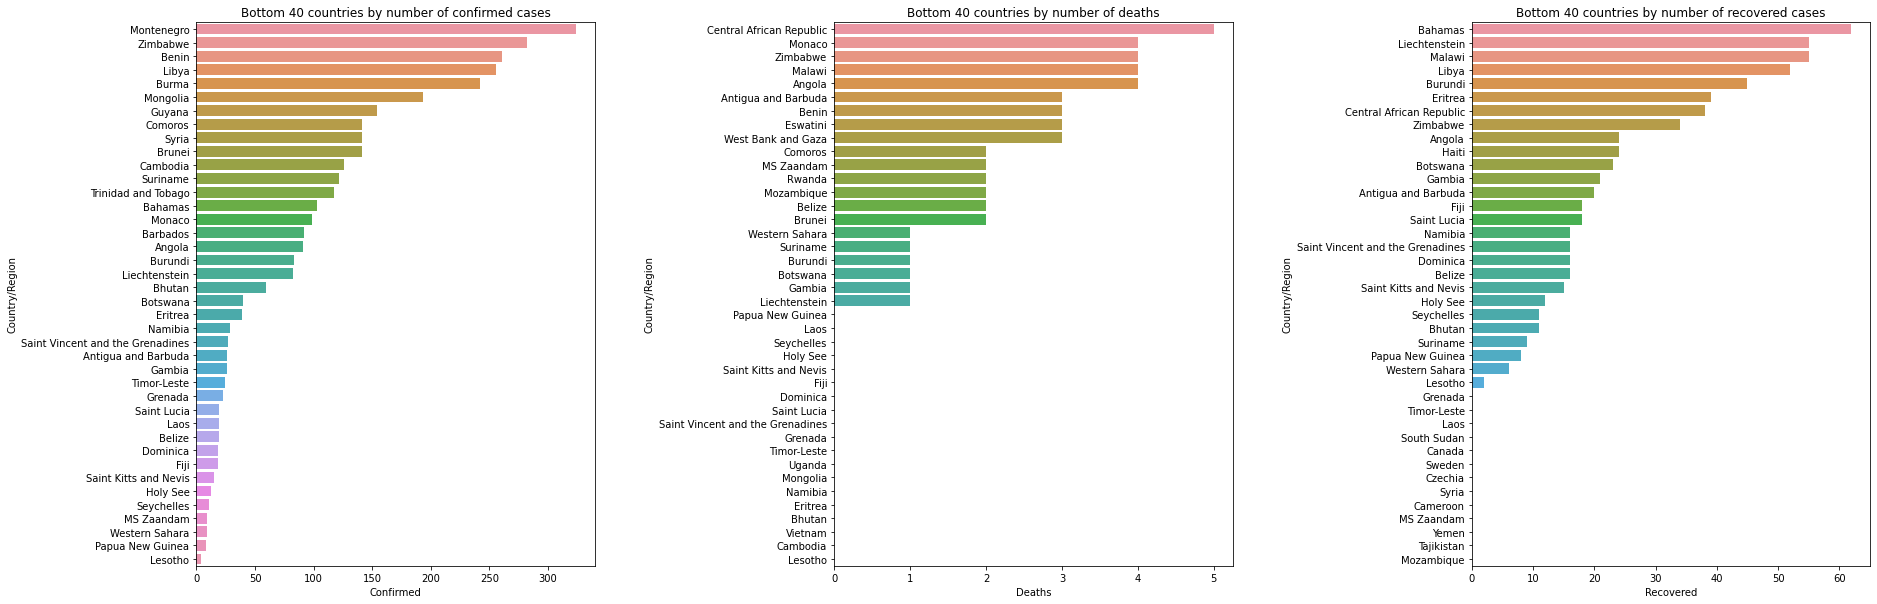

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))
plt.subplots_adjust(hspace=1, wspace=0.6)
bottom_40_confirmed_countries = byCountry.sort_values(by='Confirmed',ascending=False).tail(40)
bottom_40_death_countries = byCountry.sort_values(by='Deaths',ascending=False).tail(40)
bottom_40_recovered_countries = byCountry.sort_values(by='Recovered',ascending=False).tail(40)
sns.barplot(x=bottom_40_confirmed_countries['Confirmed'],y=bottom_40_confirmed_countries.index,ax=ax1)
sns.barplot(x=bottom_40_death_countries['Deaths'],y=bottom_40_death_countries.index,ax=ax2)
sns.barplot(x=bottom_40_recovered_countries['Recovered'],y=bottom_40_recovered_countries.index,ax=ax3)
ax1.set_title('Bottom 40 countries by number of confirmed cases')
ax2.set_title('Bottom 40 countries by number of deaths')
ax3.set_title('Bottom 40 countries by number of recovered cases')
plt.show()

Total number of confirmed cases:  257486
Total number of deaths:           7207
Total number of recovered cases:  123848
Total number of active cases:     126431
Total number of closed cases:     131055


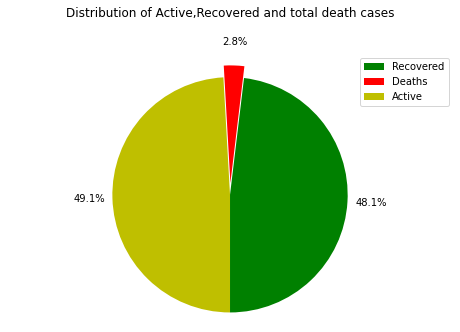

In [ ]:
#Analysis for India
covid19_India = covid19[covid19['Country/Region']=='India']
byDate_India = covid19_India.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print('Total number of confirmed cases: ',byDate_India['Confirmed'].iloc[-1])
print('Total number of deaths:          ',byDate_India['Deaths'].iloc[-1])
print('Total number of recovered cases: ',byDate_India['Recovered'].iloc[-1])
print('Total number of active cases:    ',byDate_India['Confirmed'].iloc[-1]-byDate_India['Deaths'].iloc[-1]-byDate_India['Recovered'].iloc[-1])
print('Total number of closed cases:    ',byDate_India['Deaths'].iloc[-1]+byDate_India['Recovered'].iloc[-1])
labels = ['Recovered','Deaths','Active']
sizes = [byDate_India['Recovered'].iloc[-1],byDate_India['Deaths'].iloc[-1],byDate_India['Confirmed'].iloc[-1]-byDate_India['Recovered'].iloc[-1]-byDate_India['Deaths'].iloc[-1]]
colors = ['g','r','y']
explode = [0,0.1,0]
plt.figure(figsize=(8,5))
plt.pie(sizes,autopct='%1.1f%%',explode=explode,pctdistance=1.2,colors = colors,startangle=-90)
plt.axis('equal')
plt.title('Distribution of Active,Recovered and total death cases\n\n')
plt.legend(labels=labels,loc='upper right')
plt.show()

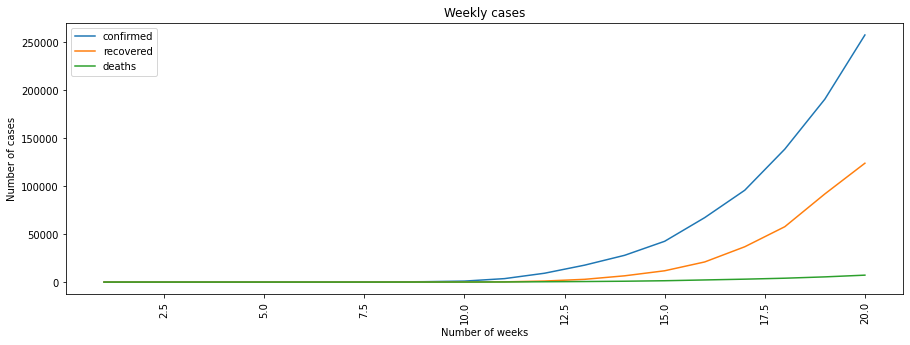

In [ ]:
byDate_India['Weekly'] = byDate_India.index.weekofyear
week_number_India = []
weekly_confirmed_India = []
weekly_recovered_India = []
weekly_deaths_India = []

week = 1
for i in list(byDate_India['Weekly'].unique()):
  weekly_confirmed_India.append(byDate_India[byDate_India['Weekly']==i]['Confirmed'].iloc[-1])
  weekly_recovered_India.append(byDate_India[byDate_India['Weekly']==i]['Recovered'].iloc[-1])
  weekly_deaths_India.append(byDate_India[byDate_India['Weekly']==i]['Deaths'].iloc[-1])
  week_number_India.append(week)
  week = week+1

plt.figure(figsize = (15,5))
sns.lineplot(week_number_India,weekly_confirmed_India,label='confirmed')
sns.lineplot(week_number_India,weekly_recovered_India,label='recovered')
sns.lineplot(week_number_India,weekly_deaths_India,label='deaths')
plt.title('Weekly cases')
plt.xlabel('Number of weeks')
plt.ylabel('Number of cases')
plt.legend()
plt.xticks(rotation=90)
plt.show()

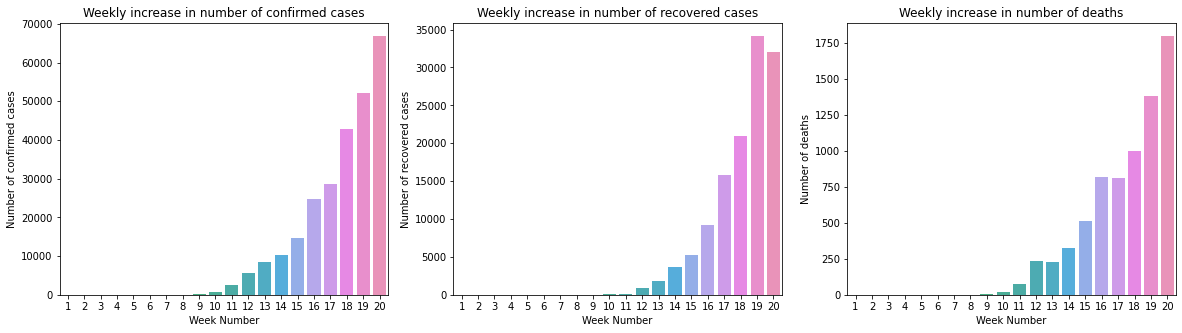

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
plt.subplots_adjust(hspace=1, wspace=0.2)
sns.barplot(x=week_number_India,y=pd.Series(weekly_confirmed_India).diff().fillna(0),ax=ax1)
sns.barplot(x=week_number_India,y=pd.Series(weekly_recovered_India).diff().fillna(0),ax=ax2)
sns.barplot(x=week_number_India,y=pd.Series(weekly_deaths_India).diff().fillna(0),ax=ax3)
ax1.set_xlabel('Week Number')
ax2.set_xlabel('Week Number')
ax3.set_xlabel('Week Number')
ax1.set_ylabel('Number of confirmed cases')
ax2.set_ylabel('Number of recovered cases')
ax3.set_ylabel('Number of deaths')
ax1.set_title('Weekly increase in number of confirmed cases')
ax2.set_title('Weekly increase in number of recovered cases')
ax3.set_title('Weekly increase in number of deaths')
plt.show()

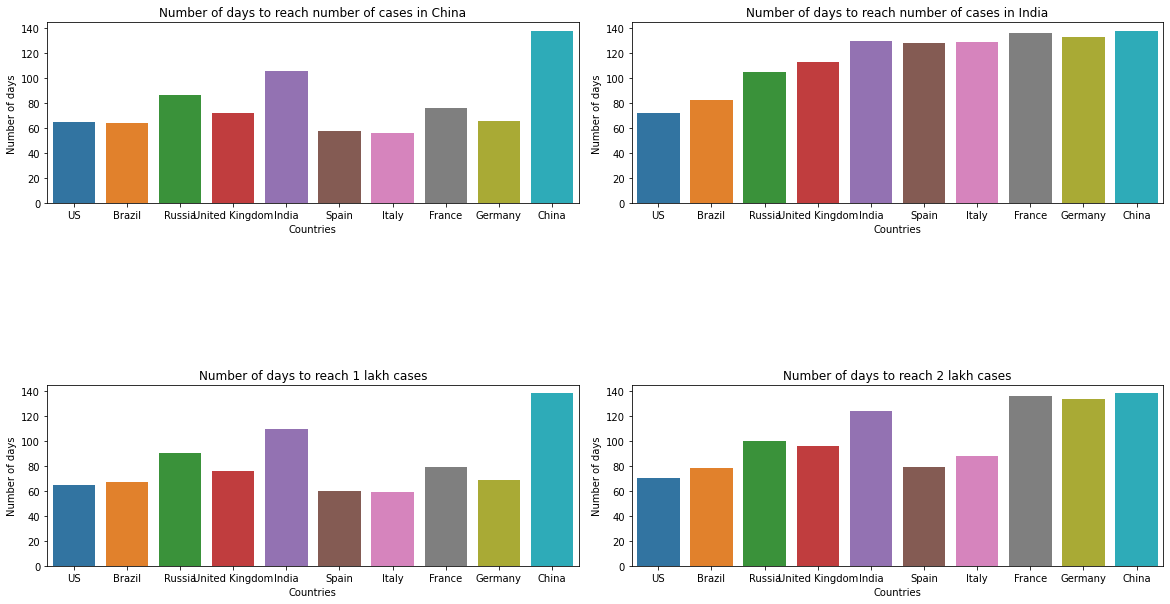

In [ ]:
#Time taken by India to reach present number of cases compared to other countries
max_India = byDate_India['Confirmed'].max()
covid19_China = covid19[covid19['Country/Region']=='China']
byDate_China = covid19_China.groupby(['Date']).agg({'Confirmed':'sum'})
max_China = byDate_China['Confirmed'].max()
countries = ['US','Brazil','Russia','United Kingdom','India','Spain','Italy','France','Germany','China']
Number_of_days_to_reach_max_India = []
Number_of_days_to_reach_max_China = []
Number_of_days_to_reach_1lakhs = []
Number_of_days_to_reach_2lakhs = []
for country in countries:
  covid19_country = covid19[covid19['Country/Region']==country]
  byDate_country = covid19_country.groupby(['Date']).agg({'Confirmed':'sum'})
  n1 = byDate_country[(byDate_country['Confirmed']>0) & (byDate_country['Confirmed']<=max_China)].shape[0]
  n2 = byDate_country[(byDate_country['Confirmed']>0) & (byDate_country['Confirmed']<=max_India)].shape[0]
  n3 = byDate_country[(byDate_country['Confirmed']>0) & (byDate_country['Confirmed']<=100000)].shape[0]
  n4 = byDate_country[(byDate_country['Confirmed']>0) & (byDate_country['Confirmed']<=200000)].shape[0]
  Number_of_days_to_reach_max_China.append(n1)
  Number_of_days_to_reach_max_India.append(n2)
  Number_of_days_to_reach_1lakhs.append(n3)
  Number_of_days_to_reach_2lakhs.append(n4)

fig,axes = plt.subplots(2,2,figsize=(20,10))
plt.subplots_adjust(hspace=1, wspace=0.1)
sns.barplot(x=pd.Series(countries), y=pd.Series(Number_of_days_to_reach_max_China),ax=axes[0][0])
sns.barplot(x=pd.Series(countries), y=pd.Series(Number_of_days_to_reach_max_India),ax=axes[0][1])
sns.barplot(x=pd.Series(countries), y=pd.Series(Number_of_days_to_reach_1lakhs),ax=axes[1][0])
sns.barplot(x=pd.Series(countries), y=pd.Series(Number_of_days_to_reach_2lakhs),ax=axes[1][1])
axes[0][0].set_xlabel('Countries')
axes[0][1].set_xlabel('Countries')
axes[1][0].set_xlabel('Countries')
axes[1][1].set_xlabel('Countries')
axes[0][0].set_ylabel('Number of days')
axes[0][1].set_ylabel('Number of days')
axes[1][0].set_ylabel('Number of days')
axes[1][1].set_ylabel('Number of days')
axes[0][0].set_title('Number of days to reach number of cases in China')
axes[0][1].set_title('Number of days to reach number of cases in India')
axes[1][0].set_title('Number of days to reach 1 lakh cases')
axes[1][1].set_title('Number of days to reach 2 lakh cases')
plt.show()

In [ ]:
byDate['Days Since'] = byDate.index-byDate.index[0]
byDate['Days Since'] = byDate['Days Since'].dt.days
train_data = byDate.iloc[:int(byDate.shape[0]*0.95)]
test_data = byDate.iloc[int(byDate.shape[0]*0.95):]

In [ ]:
#Building the support vector regression model
#we will choose the best parameter for SVR model
kernel = ['poly','sigmoid','rbf']
C = [0.01,0.1,1,10]
gamma = [0.01,0.1,1]
epsilon = [0.01,0.1,1]
shrinking = [True,False]
svm_grid = {'kernel':kernel,'C':C,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}
SVM = SVR()
svm_search = RandomizedSearchCV(SVM,svm_grid,cv=3)
svm_search.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
svm_search.best_params_

{'C': 10, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly', 'shrinking': False}

In [ ]:
svm_confirmed = svm_search.best_estimator_
svm_confirmed

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [ ]:
#svm_confirmed.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))
prediction_SVM = svm_confirmed.predict(np.array(test_data['Days Since']).reshape(-1,1))
rmse_SVM = np.sqrt(mean_squared_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_SVM))
print(rmse_SVM)
print('Percentage accuracy for support vector regression model: ',(1-np.mean(np.abs((np.array(test_data['Confirmed']).reshape(-1,1)-prediction_SVM)/np.array(test_data['Confirmed']).reshape(-1,1))))*100,'%')

703556.8386332777
Percentage accuracy for support vector regression model:  89.18434497674437 %


In [ ]:
#Building the random forest model
RF_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

RF = RandomForestRegressor()
RF_search = RandomizedSearchCV(RF,RF_grid,cv=3)
RF_search.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
RF_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
RF_confirmed = RF_search.best_estimator_
RF_confirmed

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
prediction_RF = RF_confirmed.predict(np.array(test_data['Days Since']).reshape(-1,1))
rmse_RF = np.sqrt(mean_squared_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_RF))
print(rmse_RF)
print('Percentage accuracy for Random Forest regression model: ',(1-np.mean(np.abs((np.array(test_data['Confirmed']).reshape(-1,1)-prediction_RF)/np.array(test_data['Confirmed']).reshape(-1,1))))*100,'%')

579938.2958137813
Percentage accuracy for Random Forest regression model:  92.25260470850792 %


In [ ]:
#Building the gradient boost model
GB_grid = {
    'n_estimators':[100,500], 
    'learning_rate': [0.1,0.05,0.02],
    'max_depth':[4], 
    'min_samples_leaf':[3], 
    'max_features':[1.0]
}
GB = GradientBoostingRegressor()
GB_search = RandomizedSearchCV(GB,GB_grid,cv=3)
GB_search.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [ ]:
GB_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 1.0,
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [ ]:
GB_confirmed = GB_search.best_estimator_
GB_confirmed

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
prediction_GB = GB_confirmed.predict(np.array(test_data['Days Since']).reshape(-1,1))
rmse_GB = np.sqrt(mean_squared_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_GB))
print(rmse_GB)
print('Percentage accuracy for Gradient Boost regression model: ',(1-np.mean(np.abs((np.array(test_data['Confirmed']).reshape(-1,1)-prediction_GB)/np.array(test_data['Confirmed']).reshape(-1,1))))*100,'%')

635367.3524494157
Percentage accuracy for Gradient Boost regression model:  91.33393429774499 %


In [ ]:
#predict for next 10 days using these 3 models

new_date = []
new_prediction_SVM = []
new_prediction_RF = []
new_prediction_GB = []
for i in range(1,10):
  new_date.append(byDate.index[-1]+timedelta(days=i))
  new_prediction_SVM.append(svm_confirmed.predict(np.array(byDate['Days Since'].max()+i).reshape(-1,1))[0])
  new_prediction_RF.append(RF_confirmed.predict(np.array(byDate['Days Since'].max()+i).reshape(-1,1))[0])
  new_prediction_GB.append(GB_confirmed.predict(np.array(byDate['Days Since'].max()+i).reshape(-1,1))[0])
pd.set_option('display.float_format',lambda x: '%.f'%x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_SVM,new_prediction_RF,new_prediction_GB),columns=['Dates','SVR','RF','GB'])
model_predictions.head(10)

,Dates,SVR,RF,GB
0,2020-06-08,8006261,6112976,6052101
1,2020-06-09,8181533,6112976,6052101
2,2020-06-10,8359344,6112976,6052101
3,2020-06-11,8539714,6112976,6052101
4,2020-06-12,8722660,6112976,6052101
5,2020-06-13,8908202,6112976,6052101
6,2020-06-14,9096356,6112976,6052101
7,2020-06-15,9287143,6112976,6052101
8,2020-06-16,9480578,6112976,6052101
